PROYEK ANALISIS DATA: Air-Quality-Dataset
- Nama: Nathanael Dennis Gunawan
- Email: dennisgunawan100@gmail.com
- ID Dicoding: MC325D5Y2201 

MENENTUKAN PERTANYAAN BISNIS
- Bagaimana tren perubahan kualitas udara di ketiga lokasi selama periode 2013-2017?
- Bagaimana hubungan antara suhu, kelembaban, tekanan udara dengan tingkat polusi udara (PM2.5)?

LIBRARY YANG DIGUNAKAN

In [162]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium 

- Kode tersebut digunakan untuk mengimpor berbagai library yang nantinya akan digunakan untuk melakukan analisis data dan visualisasi data 

DATA WRANGLING

Gathering Data

In [163]:
Dongsi_df = pd.read_csv("Data/PRSA_Data_Dongsi_20130301-20170228.csv")
Dongsi_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,9.0,9.0,3.0,17.0,300.0,89.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Dongsi
1,2,2013,3,1,1,4.0,4.0,3.0,16.0,300.0,88.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Dongsi
2,3,2013,3,1,2,7.0,7.0,NaN,17.0,300.0,60.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Dongsi
3,4,2013,3,1,3,3.0,3.0,5.0,18.0,NaN,NaN,-1.4,1026.2,-25.5,0.0,N,4.9,Dongsi
4,5,2013,3,1,4,3.0,3.0,7.0,NaN,200.0,84.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Dongsi


- Kode kode tersebut digunakan untuk membaca dataset yang disiapkan dan memunculkan 5 baris pertama

In [164]:
Gucheng_df = pd.read_csv("Data/PRSA_Data_Gucheng_20130301-20170228.csv")
Gucheng_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,6.0,18.0,5.0,NaN,800.0,88.0,0.1,1021.1,-18.6,0.0,NW,4.4,Gucheng
1,2,2013,3,1,1,6.0,15.0,5.0,NaN,800.0,88.0,-0.3,1021.5,-19.0,0.0,NW,4.0,Gucheng
2,3,2013,3,1,2,5.0,18.0,NaN,NaN,700.0,52.0,-0.7,1021.5,-19.8,0.0,WNW,4.6,Gucheng
3,4,2013,3,1,3,6.0,20.0,6.0,NaN,NaN,NaN,-1.0,1022.7,-21.2,0.0,W,2.8,Gucheng
4,5,2013,3,1,4,5.0,17.0,5.0,NaN,600.0,73.0,-1.3,1023.0,-21.4,0.0,WNW,3.6,Gucheng


- Kode kode tersebut digunakan untuk membaca dataset yang disiapkan dan memunculkan 5 baris pertama

In [165]:
Huairou_df = pd.read_csv("Data/PRSA_Data_Huairou_20130301-20170228.csv")
Huairou_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,7.0,7.0,3.0,2.0,100.0,91.0,-2.3,1020.3,-20.7,0.0,WNW,3.1,Huairou
1,2,2013,3,1,1,4.0,4.0,3.0,NaN,100.0,92.0,-2.7,1020.8,-20.5,0.0,NNW,1.5,Huairou
2,3,2013,3,1,2,4.0,4.0,NaN,NaN,100.0,91.0,-3.2,1020.6,-21.4,0.0,NW,1.8,Huairou
3,4,2013,3,1,3,3.0,3.0,3.0,2.0,NaN,NaN,-3.3,1021.3,-23.7,0.0,NNW,2.4,Huairou
4,5,2013,3,1,4,3.0,3.0,7.0,NaN,300.0,86.0,-4.1,1022.1,-22.7,0.0,NNW,2.2,Huairou


- Kode kode tersebut digunakan untuk membaca dataset yang disiapkan dan memunculkan 5 baris pertama

Insight:
- Data dari tiga dataset berbeda (Dongsi, Gucheng, Huairou) telah berhasil dibaca dan dikumpulkan
- Setiap dataset memiliki format yang seragam (Kolom yang sama)
- Tidak ada kesalahan format saat membaca dataset, data dapat dibaca dengan mudah
- Tetapi Beberapa data memiliki nilai yang hilang (NaN)
- Kolom tanggal masih terpisah sehingga perlu digabungkan

Assessing Data

Menilai Tabel Dongsi_df

In [166]:
Dongsi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34314 non-null  float64
 6   PM10     34511 non-null  float64
 7   SO2      34401 non-null  float64
 8   NO2      33463 non-null  float64
 9   CO       31867 non-null  float64
 10  O3       34400 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34986 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


- Mengecek informasi umum dari masing masing dataset

In [167]:
Dongsi_df.isna().sum()
print("Jumlah duplikasi: ", Dongsi_df.duplicated().sum())

Jumlah duplikasi:  0


- Mengecek missing value dan duplikat

In [168]:
Dongsi_df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34314.000000,34511.000000,34401.000000,33463.000000,31867.000000,34400.000000,35044.000000,35044.000000,35044.000000,35044.000000,35050.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,86.194297,110.336742,18.531107,53.699443,1330.069131,57.210637,13.671490,1012.547419,2.447535,0.064020,1.860785
std,10122.249256,1.177213,3.448752,8.800218,6.922285,86.575127,98.219860,22.905655,33.959230,1191.305887,58.033275,11.458418,10.266059,13.810696,0.786282,1.280368
min,1.000000,2013.000000,1.000000,1.000000,0.000000,3.000000,2.000000,0.285600,2.000000,100.000000,0.642600,-16.800000,987.100000,-35.300000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,22.000000,38.000000,4.000000,27.000000,600.000000,12.000000,3.100000,1004.000000,-8.800000,0.000000,1.000000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,61.000000,86.000000,10.000000,47.000000,1000.000000,44.125200,14.600000,1012.200000,3.000000,0.000000,1.500000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,119.000000,151.000000,24.000000,73.000000,1700.000000,81.000000,23.500000,1020.900000,15.000000,0.000000,2.400000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,737.000000,955.000000,300.000000,258.000000,10000.000000,1071.000000,41.100000,1042.000000,28.800000,46.400000,10.500000


- Mengecek statistik deskriptif dari masing masing dataset

Menilai Tabel Gucheng_df

In [169]:
Gucheng_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34418 non-null  float64
 6   PM10     34683 non-null  float64
 7   SO2      34557 non-null  float64
 8   NO2      34396 non-null  float64
 9   CO       33663 non-null  float64
 10  O3       34335 non-null  float64
 11  TEMP     35013 non-null  float64
 12  PRES     35014 non-null  float64
 13  DEWP     35013 non-null  float64
 14  RAIN     35021 non-null  float64
 15  wd       34905 non-null  object 
 16  WSPM     35022 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


- Mengecek informasi umum dari masing masing dataset

In [170]:
Gucheng_df.isna().sum()
print("Jumlah duplikasi: ", Gucheng_df.duplicated().sum())

Jumlah duplikasi:  0


- Mengecek missing value dan duplikat

In [171]:
Gucheng_df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34418.000000,34683.000000,34557.000000,34396.000000,33663.000000,34335.000000,35013.000000,35014.000000,35013.000000,35021.000000,35022.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,83.852089,118.861978,15.366162,55.871075,1323.974423,57.694879,13.864524,1008.829592,2.610442,0.064453,1.343310
std,10122.249256,1.177213,3.448752,8.800218,6.922285,82.796445,96.742626,21.204526,36.473860,1208.957772,57.019587,11.292857,10.103256,13.782991,0.838654,1.151064
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,2.000000,100.000000,0.214200,-15.600000,984.000000,-34.600000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,24.000000,45.000000,2.000000,26.000000,600.000000,10.000000,3.600000,1000.500000,-8.900000,0.000000,0.600000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,60.000000,99.000000,7.000000,50.000000,900.000000,45.000000,14.800000,1008.500000,3.000000,0.000000,1.000000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,115.750000,167.000000,20.000000,79.000000,1600.000000,83.000000,23.500000,1017.000000,15.300000,0.000000,1.800000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,770.000000,994.000000,500.000000,276.000000,10000.000000,450.000000,41.600000,1038.100000,27.400000,41.900000,12.000000


- Mengecek statistik deskriptif dari masing masing dataset

Menilai Tabel Huairou_df

In [172]:
Huairou_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34111 non-null  float64
 6   PM10     34287 non-null  float64
 7   SO2      34084 non-null  float64
 8   NO2      33425 non-null  float64
 9   CO       33642 non-null  float64
 10  O3       33913 non-null  float64
 11  TEMP     35013 non-null  float64
 12  PRES     35011 non-null  float64
 13  DEWP     35011 non-null  float64
 14  RAIN     35009 non-null  float64
 15  wd       34762 non-null  object 
 16  WSPM     35015 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


- Mengecek informasi umum dari masing masing dataset

In [173]:
Huairou_df.isna().sum()
print("Jumlah duplikasi: ", Huairou_df.duplicated().sum())

Jumlah duplikasi:  0


- Mengecek missing value dan duplikat

In [174]:
Huairou_df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34111.000000,34287.000000,34084.000000,33425.000000,33642.000000,33913.000000,35013.000000,35011.000000,35011.000000,35009.000000,35015.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,69.626367,91.482690,12.121553,32.497250,1022.554545,59.824713,12.445426,1007.598568,2.238619,0.067940,1.652021
std,10122.249256,1.177213,3.448752,8.800218,6.922285,71.224916,83.289578,18.896912,26.489531,898.738241,54.605746,11.751103,10.022101,14.052541,0.849046,1.199143
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-19.900000,982.800000,-43.400000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,17.000000,28.000000,2.000000,12.000000,400.000000,18.000000,2.100000,999.300000,-9.600000,0.000000,0.900000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,47.000000,69.000000,4.000000,25.000000,800.000000,49.000000,13.600000,1007.300000,2.700000,0.000000,1.300000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,98.000000,131.000000,14.000000,46.000000,1300.000000,83.000000,22.300000,1015.500000,15.300000,0.000000,2.000000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,762.000000,993.000000,315.000000,231.000000,10000.000000,444.000000,40.300000,1036.500000,29.100000,45.900000,12.900000


- Mengecek statistik deskriptif dari masing masing dataset

Insight: 
- Dataset dari Dongsi, Gucheng, dan Huairou telah diperiksa untuk melihat keberadaan data yang hilang
- Kolom yang paling sering memiliki nilai hilang adalah PM2.5, PM10, SO2, dan CO, yang bisa berdampak pada analisis kualitas udara
- Kolom date perlu disatukan
- Distribusi polutan seperti PM2.5 dan PM10 bervariasi antar lokasi, menunjukkan pola polusi yang mungkin berbeda
- Perlu diilakukan pembersihan data

Cleaning Data

Membersihkan tabel Dongsi_df

In [175]:
Dongsi_df.drop_duplicates(inplace=True)
print("Jumlah duplikasi: ", Dongsi_df.duplicated().sum())

Dongsi_df = Dongsi_df.dropna(how='all')

Dongsi_df.fillna(Dongsi_df.median(numeric_only=True), inplace=True)

Dongsi_df.isnull().sum()

Jumlah duplikasi:  0


No          0
year        0
month       0
day         0
hour        0
PM2.5       0
PM10        0
SO2         0
NO2         0
CO          0
O3          0
TEMP        0
PRES        0
DEWP        0
RAIN        0
wd         78
WSPM        0
station     0
dtype: int64

- Membersihkan nilai duplikat yang ada di masing masing dataset
- Menghapus baris yyang memiliki nilai NaN
- Mengisi nilai NaN pada kolom dengan nilai median
- Mengetahui jumlah data yang hilang di setiap kolom

Membersihkan tabel Gucheng_df

In [176]:
Gucheng_df.drop_duplicates(inplace=True)
print("Jumlah duplikasi: ", Gucheng_df.duplicated().sum())

Gucheng_df = Gucheng_df.dropna(how='all')

Gucheng_df.fillna(Gucheng_df.median(numeric_only=True), inplace=True)

Gucheng_df.isnull().sum()

Jumlah duplikasi:  0


No           0
year         0
month        0
day          0
hour         0
PM2.5        0
PM10         0
SO2          0
NO2          0
CO           0
O3           0
TEMP         0
PRES         0
DEWP         0
RAIN         0
wd         159
WSPM         0
station      0
dtype: int64

- Membersihkan nilai duplikat yang ada di masing masing dataset
- Menghapus baris yyang memiliki nilai NaN
- Mengisi nilai NaN pada kolom dengan nilai median
- Mengetahui jumlah data yang hilang di setiap kolom

Membersihkan tabel Huairou_df

In [177]:
Huairou_df.drop_duplicates(inplace=True)
print("Jumlah duplikasi: ", Huairou_df.duplicated().sum())

Huairou_df = Huairou_df.dropna(how='all')

Huairou_df.fillna(Huairou_df.median(numeric_only=True), inplace=True)

Huairou_df.isnull().sum()

Jumlah duplikasi:  0


No           0
year         0
month        0
day          0
hour         0
PM2.5        0
PM10         0
SO2          0
NO2          0
CO           0
O3           0
TEMP         0
PRES         0
DEWP         0
RAIN         0
wd         302
WSPM         0
station      0
dtype: int64

- Membersihkan nilai duplikat yang ada di masing masing dataset
- Menghapus baris yyang memiliki nilai NaN
- Mengisi nilai NaN pada kolom dengan nilai median
- Mengetahui jumlah data yang hilang di setiap kolom

Insight: 
- Duplikasi data telah dihapus dari ketiga dataset (Dongsi, Gucheng, Huairou)
- Nilai NaN yang ditemukan pada beberapa parameter seperti PM2.5, PM10, SO2, CO, dan lainnya telah ditangani menggunakan nilai median
- Data kini lebih bersih, bebas duplikasi, serta minim missing values, sehingga siap untuk tahap EDA

EXPLORATORY DATA ANALYSIS (EDA)

Explore Dongsi_df

In [178]:
Dongsi_df.sample(5)

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
724,725,2013,3,31,4,108.0,117.0,20.0,50.0,1500.0,19.0,3.9,1018.3,1.4,0.0,E,2.1,Dongsi
4453,4454,2013,9,2,13,56.0,69.0,23.0,24.0,1000.0,145.0,26.8,1010.9,14.2,0.0,SE,2.6,Dongsi
30925,30926,2016,9,9,13,7.0,7.0,2.0,14.0,400.0,75.0,30.1,1004.1,10.6,0.0,WNW,3.0,Dongsi
22589,22590,2015,9,28,5,29.0,29.0,2.0,31.0,500.0,46.0,17.3,1015.9,15.1,0.0,SE,1.8,Dongsi
1027,1028,2013,4,12,19,56.0,115.0,26.0,57.0,700.0,80.0,21.3,1004.8,-1.3,0.0,SW,4.2,Dongsi


- Mengambil 5 baris acak dari masing masing dataset

In [179]:
Dongsi_df.describe(include="all")

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34986,35064.000000,35064
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,NaN,1
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ENE,NaN,Dongsi
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3861,NaN,35064
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,85.655404,109.952923,18.369798,53.393550,1299.974703,56.962841,13.672019,1012.547221,2.447850,0.063983,NaN,1.860641,NaN
std,10122.249256,1.177213,3.448752,8.800218,6.922285,85.721734,97.489403,22.717797,33.204335,1139.664773,57.508815,11.455171,10.263134,13.806763,0.786059,NaN,1.280133,NaN
min,1.000000,2013.000000,1.000000,1.000000,0.000000,3.000000,2.000000,0.285600,2.000000,100.000000,0.642600,-16.800000,987.100000,-35.300000,0.000000,NaN,0.000000,NaN
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,23.000000,38.000000,4.000000,28.000000,600.000000,13.000000,3.100000,1004.000000,-8.800000,0.000000,NaN,1.000000,NaN
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,61.000000,86.000000,10.000000,47.000000,1000.000000,44.125200,14.600000,1012.200000,3.000000,0.000000,NaN,1.500000,NaN
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,117.000000,150.000000,24.000000,72.000000,1600.000000,80.000000,23.500000,1020.900000,15.000000,0.000000,NaN,2.400000,NaN


- Memberikan ringkasan statistik dari semua jenis data dalam DataFrame

In [180]:
Dongsi_df.No.is_unique

True

- Mengetahui bahwa primary key dari setiap dataset adalah kolom No

In [181]:
Dongsi_df.No.duplicated

<bound method Series.duplicated of 0            1
1            2
2            3
3            4
4            5
         ...  
35059    35060
35060    35061
35061    35062
35062    35063
35063    35064
Name: No, Length: 35064, dtype: int64>

- Mengetahui panjang dan tipe datadari kolom No

In [182]:
Dongsi_df.groupby(by="month").agg({
    "PM2.5": ["max", "min", "mean", "std"],
    "PM10": ["max", "min", "mean", "std"],
    "SO2": ["max", "min", "mean", "std"]
})

PM2.5                                PM10                               \
         max  min        mean         std    max  min        mean         std   
month                                                                           
1      681.0  3.0  100.160484  109.693764  955.0  5.0  118.292406  121.426464   
2      737.0  3.0   93.205383  107.732411  876.0  5.0  109.005900  113.010985   
3      520.0  3.0  100.015558   91.713987  891.0  3.0  142.623353  115.688993   
4      460.0  3.0   76.835069   57.720977  663.0  3.0  121.094097   80.067398   
5      408.0  3.0   69.824227   54.247084  848.0  5.0  108.213642   76.242178   
6      515.0  3.0   72.801042   59.593234  551.0  2.0   87.440486   61.880534   
7      287.0  3.0   79.198253   56.321243  354.0  2.0   85.928427   56.644626   
8      235.0  3.0   58.683031   43.619946  349.0  2.0   73.830175   52.716204   
9      323.0  3.0   67.132604   56.301079  316.0  2.0   84.635729   60.089259   
10     450.0  3.0   97.681788   94.417029  508.0  3.0  122.503360  101.131760   
11     685.0  3.0   99.650035   98.036851  794.0  5.0  126.702847  111.116178   
12     680.0  3.0  112.501882  128.496979  737.0  2.0  138.437466  139.185381   

            SO2                                
            max     min       mean        std  
month                                          
1      300.0000  1.0000  33.287063  30.958333  
2      278.0000  2.0000  30.433260  33.822403  
3      198.0000  2.0000  30.359783  28.767931  
4      111.0000  2.0000  16.503801  15.354073  
5      157.0000  2.0000  17.502621  18.928561  
6       89.0000  0.2856  10.824352  12.690761  
7      109.0992  0.2856   7.355403   7.465145  
8       55.0000  0.2856   6.001276   5.691135  
9      104.0000  1.0000   8.185375   9.817773  
10     178.0000  1.0000  12.232286  15.423401  
11     196.0000  2.0000  19.297882  19.019208  
12     164.0000  2.0000  28.922434  25.682248

- Mengelompokkan data berdasarkan bulan untuk melihat distribusi polusi tiap bulan

In [183]:
Dongsi_df.groupby(by="year").No.nunique().sort_values(ascending=False)

year
2016    8784
2014    8760
2015    8760
2013    7344
2017    1416
Name: No, dtype: int64

- Mengelompokkan data berdasarkan tahun untuk melihat jumlah nilai unik untuk tiap tahun

Explore Gucheng_df

In [184]:
Gucheng_df.sample(5)

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
4860,4861,2013,9,19,12,128.0,77.0,4.0,40.0,2000.0,30.0,25.0,1004.7,20.7,0.0,S,0.7,Gucheng
22878,22879,2015,10,10,6,6.0,6.0,2.0,9.0,200.0,41.0,10.0,1009.1,-5.2,0.0,WNW,1.3,Gucheng
15669,15670,2014,12,13,21,108.0,212.0,45.0,67.0,2500.0,3.0,-1.9,1018.0,-15.7,0.0,WNW,1.8,Gucheng
3438,3439,2013,7,22,6,89.0,111.0,3.0,81.0,1200.0,4.0,24.1,997.3,21.6,0.0,SE,0.5,Gucheng
34463,34464,2017,2,3,23,342.0,386.0,61.0,139.0,4200.0,2.0,-0.4,1012.8,-11.2,0.0,NNE,0.9,Gucheng


- Mengambil 5 baris acak dari masing masing dataset

In [185]:
Gucheng_df.describe(include="all")

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34905,35064.000000,35064
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,NaN,1
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,Gucheng
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3949,NaN,35064
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,83.412651,118.646161,15.245193,55.759226,1307.034309,57.430945,13.865885,1008.829122,2.611008,0.064374,NaN,1.342899,NaN
std,10122.249256,1.177213,3.448752,8.800218,6.922285,82.092868,96.237612,21.074340,36.133665,1187.465580,56.452790,11.284697,10.096057,13.772971,0.838142,NaN,1.150436,NaN
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,2.000000,100.000000,0.214200,-15.600000,984.000000,-34.600000,0.000000,NaN,0.000000,NaN
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,25.000000,46.000000,2.000000,26.000000,600.000000,10.000000,3.700000,1000.500000,-8.900000,0.000000,NaN,0.600000,NaN
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,60.000000,99.000000,7.000000,50.000000,900.000000,45.000000,14.800000,1008.500000,3.000000,0.000000,NaN,1.000000,NaN
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,114.000000,166.000000,19.000000,78.000000,1600.000000,82.000000,23.500000,1017.000000,15.300000,0.000000,NaN,1.800000,NaN


- Memberikan ringkasan statistik dari semua jenis data dalam DataFrame

In [186]:
Gucheng_df.No.is_unique

True

- Mengetahui bahwa primary key dari setiap dataset adalah kolom No

In [187]:
Gucheng_df.No.duplicated

<bound method Series.duplicated of 0            1
1            2
2            3
3            4
4            5
         ...  
35059    35060
35060    35061
35061    35062
35062    35063
35063    35064
Name: No, Length: 35064, dtype: int64>

- Mengetahui panjang dan tipe datadari kolom No

In [188]:
Gucheng_df.groupby(by="month").agg({
    "PM2.5": ["max", "min", "mean", "std"],
    "PM10": ["max", "min", "mean", "std"],
    "SO2": ["max", "min", "mean", "std"]
})

PM2.5                                PM10                               \
         max  min        mean         std    max  min        mean         std   
month                                                                           
1      767.0  3.0  100.103696  106.735094  994.0  5.0  121.703528  115.375597   
2      770.0  3.0   89.317109   98.896309  817.0  5.0  107.219764  104.327456   
3      458.0  3.0   98.191297   89.421614  983.0  5.0  151.573925  115.147353   
4      533.0  2.0   75.431944   55.357886  800.0  3.0  135.662153   86.133604   
5      337.0  3.0   67.067675   48.717172  986.0  4.0  129.706116   87.646906   
6      500.0  2.0   72.290278   58.355051  647.0  2.0  104.094444   69.917538   
7      375.0  3.0   71.514113   51.345864  862.0  2.0   99.928427   64.655451   
8      276.0  3.0   54.652520   41.488943  325.0  3.0   86.889315   60.087545   
9      311.0  3.0   65.507882   56.039257  356.0  2.0   95.923160   66.886178   
10     465.0  3.0   97.575941   93.055211  564.0  3.0  126.449933  100.075828   
11     546.0  3.0   99.538125   92.022812  699.0  3.0  128.025208  103.726086   
12     741.0  3.0  109.611391  121.841332  741.0  3.0  135.213374  128.172572   

         SO2                                
         max     min       mean        std  
month                                       
1      500.0  1.0000  33.375638  30.075630  
2      500.0  2.0000  28.639012  30.778127  
3      248.0  2.0000  27.467554  26.820633  
4       88.0  2.0000  12.867646  12.182758  
5      500.0  2.0000  13.382188  16.452402  
6      227.0  2.0000   5.826388   9.570658  
7       76.0  0.2856   3.806977   3.465860  
8      218.0  1.0000   3.174294   4.755015  
9       34.0  1.0000   4.578121   4.479107  
10      80.0  1.0000   6.744945   8.709340  
11     124.0  1.0000  15.813090  15.891958  
12     165.0  1.0000  27.748315  22.752859

- Mengelompokkan data berdasarkan bulan untuk melihat distribusi polusi tiap bulan

In [189]:
Gucheng_df.groupby(by="year").No.nunique().sort_values(ascending=False)

year
2016    8784
2014    8760
2015    8760
2013    7344
2017    1416
Name: No, dtype: int64

- Mengelompokkan data berdasarkan tahun untuk melihat jumlah nilai unik untuk tiap tahun

Explore Huairou_df

In [190]:
Huairou_df.sample(5)

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
30786,30787,2016,9,3,18,18.0,39.0,2.0,19.0,400.0,136.0,27.9,997.5,17.1,0.0,SE,2.4,Huairou
9044,9045,2014,3,12,20,28.0,69.0,19.0,50.0,1000.0,48.0,5.1,1015.7,-20.3,0.0,NNE,2.1,Huairou
1588,1589,2013,5,6,4,228.0,253.0,16.0,23.0,1500.0,114.0,14.7,1006.3,14.7,0.0,WNW,0.1,Huairou
5618,5619,2013,10,21,2,24.0,33.0,1.0,20.0,400.0,19.0,4.0,1014.4,2.2,0.0,N,0.5,Huairou
2792,2793,2013,6,25,8,7.0,43.0,3.0,5.0,1000.0,35.0,21.0,992.7,21.0,0.0,WSW,0.7,Huairou


- Mengambil 5 baris acak dari masing masing dataset

In [191]:
Huairou_df.describe(include="all")

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34762,35064.000000,35064
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,NaN,1
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NW,NaN,Huairou
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4943,NaN,35064
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,69.011408,90.984486,11.894565,32.146806,1013.528976,59.469384,12.447105,1007.598117,2.239317,0.067833,NaN,1.651529,NaN
std,10122.249256,1.177213,3.448752,8.800218,6.922285,70.346593,82.428022,18.678989,25.911379,881.419159,53.736632,11.742636,10.014530,14.041928,0.848384,NaN,1.198377,NaN
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-19.900000,982.800000,-43.400000,0.000000,NaN,0.000000,NaN
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,18.000000,29.000000,2.000000,13.000000,400.000000,19.000000,2.100000,999.400000,-9.600000,0.000000,NaN,0.900000,NaN
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,47.000000,69.000000,4.000000,25.000000,800.000000,49.000000,13.600000,1007.300000,2.700000,0.000000,NaN,1.300000,NaN
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,96.000000,128.000000,13.000000,45.000000,1300.000000,81.000000,22.300000,1015.500000,15.300000,0.000000,NaN,2.000000,NaN


- Memberikan ringkasan statistik dari semua jenis data dalam DataFrame

In [192]:
Huairou_df.No.is_unique

True

- Mengetahui bahwa primary key dari setiap dataset adalah kolom No

In [193]:
Huairou_df.No.duplicated

<bound method Series.duplicated of 0            1
1            2
2            3
3            4
4            5
         ...  
35059    35060
35060    35061
35061    35062
35062    35063
35063    35064
Name: No, Length: 35064, dtype: int64>

- Mengetahui panjang dan tipe datadari kolom No

In [194]:
Huairou_df.groupby(by="month").agg({
    "PM2.5": ["max", "min", "mean", "std"],
    "PM10": ["max", "min", "mean", "std"],
    "SO2": ["max", "min", "mean", "std"]
})

PM2.5                              PM10                               \
         max  min       mean        std    max  min        mean         std   
month                                                                         
1      558.0  2.0  78.369288  80.502884  750.0  5.0   93.587265   92.045558   
2      762.0  3.0  79.758149  92.151280  991.0  3.0   91.161173  100.423881   
3      534.0  3.0  88.828192  86.230974  835.0  3.0  120.744388   98.588843   
4      288.0  2.0  66.741146  53.758852  620.0  3.0  107.438090   80.726406   
5      345.0  3.0  54.205208  42.744405  695.0  3.0   93.975672   68.480067   
6      324.0  3.0  55.726736  48.777176  529.0  2.0   80.082986   65.670827   
7      384.0  3.0  66.716163  55.330679  640.0  2.0   82.822345   59.778834   
8      234.0  3.0  47.566835  40.192033  748.0  3.0   64.885215   53.153392   
9      318.0  3.0  54.399132  50.375159  432.0  3.0   68.583854   55.415305   
10     379.0  3.0  78.882392  79.897579  411.0  3.0   96.125336   83.350700   
11     422.0  3.0  76.547465  73.433606  993.0  3.0   96.677153   88.856263   
12     559.0  3.0  80.619489  95.227141  948.0  3.0   95.386156  104.774645   

            SO2                                
            max     min       mean        std  
month                                          
1      254.0000  1.0000  22.407258  26.205012  
2      315.0000  1.0000  21.476106  31.277508  
3      160.0000  2.0000  22.125843  24.834614  
4      110.0000  0.8568  11.809190  14.142504  
5      103.9584  2.0000  10.317394  12.803741  
6      120.0000  0.2856   6.085702   9.004774  
7       93.0000  0.2856   4.294345   5.216286  
8       34.0000  1.0000   3.414122   2.834148  
9       62.0000  1.0000   5.015672   6.824369  
10     103.0000  0.5712   6.787394  10.258485  
11     193.0000  1.0000  11.598958  17.199096  
12     196.0000  1.0000  17.831195  20.937090

- Mengelompokkan data berdasarkan bulan untuk melihat distribusi polusi tiap bulan

In [195]:
Huairou_df.groupby(by="year").No.nunique().sort_values(ascending=False)

year
2016    8784
2014    8760
2015    8760
2013    7344
2017    1416
Name: No, dtype: int64

- Mengelompokkan data berdasarkan tahun untuk melihat jumlah nilai unik untuk tiap tahun

Explore All Data

Menggabungkan semua data

In [196]:
Dongsi_df["station"] = "Dongsi"
Gucheng_df["station"] = "Gucheng"
Huairou_df["station"] = "Huairou"

all_df = pd.concat([Dongsi_df, Gucheng_df, Huairou_df], ignore_index=True)

all_df["datetime"] = pd.to_datetime(all_df[['year', 'month', 'day', 'hour']])

all_df = all_df.sort_values(by="datetime").reset_index(drop=True)

print(all_df.head())

   No  year  month  day  hour  PM2.5  PM10  SO2   NO2     CO    O3  TEMP  \
0   1  2013      3    1     0    9.0   9.0  3.0  17.0  300.0  89.0  -0.5   
1   1  2013      3    1     0    7.0   7.0  3.0   2.0  100.0  91.0  -2.3   
2   1  2013      3    1     0    6.0  18.0  5.0  50.0  800.0  88.0   0.1   
3   2  2013      3    1     1    4.0   4.0  3.0  16.0  300.0  88.0  -0.7   
4   2  2013      3    1     1    4.0   4.0  3.0  25.0  100.0  92.0  -2.7   

     PRES  DEWP  RAIN   wd  WSPM  station            datetime  
0  1024.5 -21.4   0.0  NNW   5.7   Dongsi 2013-03-01 00:00:00  
1  1020.3 -20.7   0.0  WNW   3.1  Huairou 2013-03-01 00:00:00  
2  1021.1 -18.6   0.0   NW   4.4  Gucheng 2013-03-01 00:00:00  
3  1025.1 -22.1   0.0   NW   3.9   Dongsi 2013-03-01 01:00:00  
4  1020.8 -20.5   0.0  NNW   1.5  Huairou 2013-03-01 01:00:00  


- Menambahkan informasi stasiun pada setiap dataset
- Menggabungkan dataset secara vertikal
- Mengurutkan berdasarkan datetime
- Menampilkan 5 baris pertama

In [197]:
dongsi_summary = all_df[all_df["station"] == "Dongsi"].groupby("month").agg({
    "PM2.5": "mean",
    "PM10": "mean",
    "SO2": "mean",
    "NO2": "mean",
    "CO": "mean",
    "O3": "mean",
    "TEMP": "mean",
    "PRES": "mean"
}).reset_index()

print(dongsi_summary.head())

   month       PM2.5        PM10        SO2        NO2           CO  \
0      1  100.160484  118.292406  33.287063  58.902184  1806.619624   
1      2   93.205383  109.005900  30.433260  45.946903  1407.817109   
2      3  100.015558  142.623353  30.359783  61.589393  1392.771169   
3      4   76.835069  121.094097  16.503801  47.213632   916.228472   
4      5   69.824227  108.213642  17.502621  45.170296   931.126680   

          O3       TEMP         PRES  
0  27.811477  -1.716067  1024.025454  
1  41.835827   1.217238  1022.169371  
2  51.536579   8.439468  1015.861229  
3  71.744455  15.439931  1010.158681  
4  91.608218  21.709039  1004.202688  


- Mengelompokkan data dari stasiun Dongsi
- Menghitung rata-rata dari parameter polusi udara
- Menampilkan 5 baris utama

In [198]:
gucheng_summary = all_df[all_df["station"] == "Gucheng"].groupby("month").agg({
    "PM2.5": "mean",
    "PM10": "mean",
    "SO2": "mean",
    "NO2": "mean",
    "CO": "mean",
    "O3": "mean",
    "TEMP": "mean",
    "PRES": "mean"
}).reset_index()

print(dongsi_summary.head())

   month       PM2.5        PM10        SO2        NO2           CO  \
0      1  100.160484  118.292406  33.287063  58.902184  1806.619624   
1      2   93.205383  109.005900  30.433260  45.946903  1407.817109   
2      3  100.015558  142.623353  30.359783  61.589393  1392.771169   
3      4   76.835069  121.094097  16.503801  47.213632   916.228472   
4      5   69.824227  108.213642  17.502621  45.170296   931.126680   

          O3       TEMP         PRES  
0  27.811477  -1.716067  1024.025454  
1  41.835827   1.217238  1022.169371  
2  51.536579   8.439468  1015.861229  
3  71.744455  15.439931  1010.158681  
4  91.608218  21.709039  1004.202688  


- Mengelompokkan data dari stasiun Gucheng
- Menghitung rata-rata dari parameter polusi udara
- Menampilkan 5 baris utama

In [199]:
huairou_summary = all_df[all_df["station"] == "Huairou"].groupby("month").agg({
    "PM2.5": "mean",
    "PM10": "mean",
    "SO2": "mean",
    "NO2": "mean",
    "CO": "mean",
    "O3": "mean",
    "TEMP": "mean",
    "PRES": "mean"
}).reset_index()

print(huairou_summary.head())

   month      PM2.5        PM10        SO2        NO2           CO         O3  \
0      1  78.369288   93.587265  22.407258  44.728730  1424.899194  28.182460   
1      2  79.758149   91.161173  21.476106  35.977802  1173.156342  43.633665   
2      3  88.828192  120.744388  22.125843  40.940991  1087.842070  56.236357   
3      4  66.741146  107.438090  11.809190  31.614909   753.148264  76.084537   
4      5  54.205208   93.975672  10.317394  26.618302   721.933468  92.638950   

        TEMP         PRES  
0  -3.376065  1018.762105  
1  -0.130986  1017.028024  
2   7.268349  1010.897991  
3  14.466528  1005.294306  
4  20.574866   999.445665  


- Mengelompokkan data dari stasiun Huairou
- Menghitung rata-rata dari parameter polusi udara
- Menampilkan 5 baris utama

In [200]:
all_df.to_csv("Dashboard/all_data.csv", index=False)

- Mengekspor data yang telah digabungkan dan dibersihkan ke file csv yang baru

Insight:
- Rata-rata PM2.5 dan PM10 cenderung lebih tinggi pada bulan-bulan yang bermusim dingin
- Stasiun Gucheng cenderung memiliki konsentrasi PM2.5 dan PM10 lebih tinggi
- Suhu (TEMP) lebih rendah pada bulan dengan polusi tinggi
- Dongsi dan Gucheng memiliki pola polusi yang mirip
- Suhu dan tekanan udara memainkan peran dalam konsentrasi polutan

VISUALIZATION & EXPLANATORY ANALYSIS

Pertanyaan 1:
Bagaimana tren perubahan kualitas udara di ketiga lokasi selama periode 2013-2017?

In [201]:
all_df.sample(5)

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,datetime
43251,14418,2014,10,22,17,82.0,150.0,8.0,57.0,900.0,21.000,13.8,1012.2,8.2,0.0,WSW,0.5,Gucheng,2014-10-22 17:00:00
83786,27929,2016,5,7,16,42.0,42.0,2.0,14.0,100.0,139.000,26.7,1011.2,-7.5,0.0,SSW,2.7,Dongsi,2016-05-07 16:00:00
50343,16782,2015,1,29,5,110.0,110.0,14.0,29.0,3200.0,15.000,-4.0,1026.0,-7.3,0.0,SW,2.1,Dongsi,2015-01-29 05:00:00
9432,3145,2013,7,10,0,27.0,30.0,3.0,25.0,400.0,2.000,21.9,995.2,21.9,0.0,WNW,1.0,Huairou,2013-07-10 00:00:00
21739,7247,2013,12,27,22,47.0,57.0,58.0,51.0,800.0,4.284,-7.2,1017.9,-15.9,0.0,SSW,0.5,Huairou,2013-12-27 22:00:00


- Kode tersebut untuk mengambil 5 baris secara acak dalam dataset yang sudah digabungkan

In [202]:
df_selected_yearly = all_df.groupby(["year", "station"])[["PM2.5", "PM10", "SO2", "NO2", "CO", "O3"]].mean().reset_index()

- Agregasi data tahunan untuk tiap stasiun

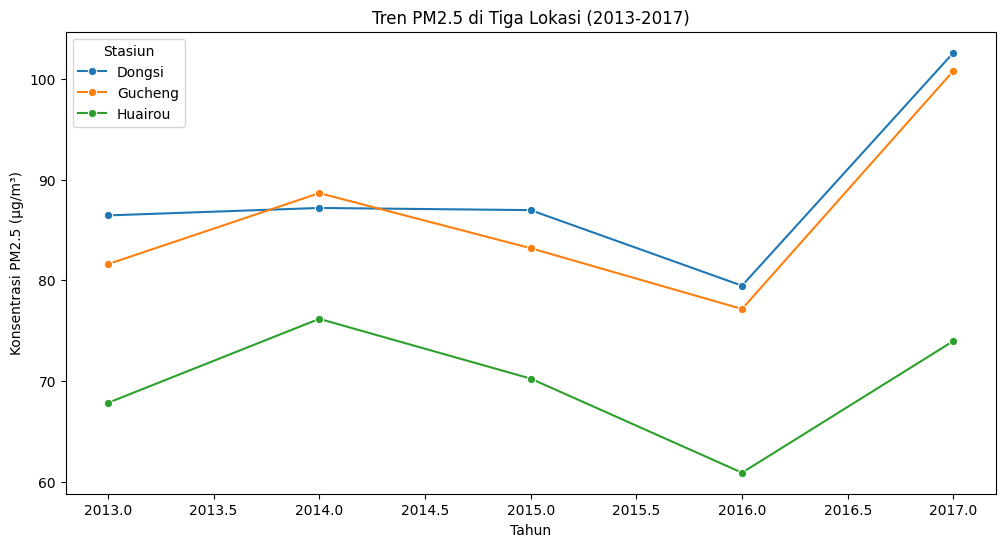

In [203]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_selected_yearly, x="year", y="PM2.5", hue="station", marker="o")
plt.title("Tren PM2.5 di Tiga Lokasi (2013-2017)")
plt.xlabel("Tahun")
plt.ylabel("Konsentrasi PM2.5 (µg/m³)")
plt.legend(title="Stasiun")
plt.show()

- Kode tersebut untuk mengetahui tren tahunan untuk PM2.5

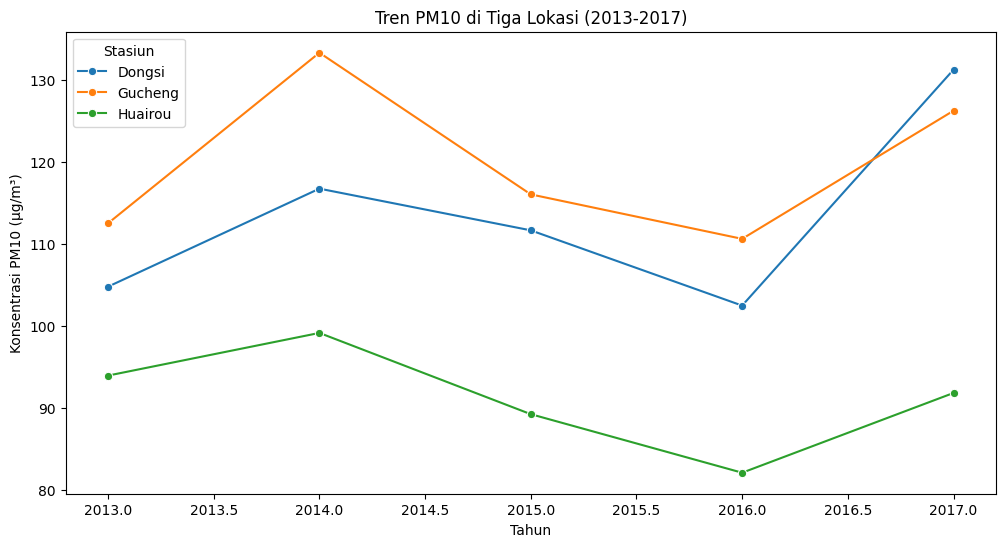

In [204]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_selected_yearly, x="year", y="PM10", hue="station", marker="o")
plt.title("Tren PM10 di Tiga Lokasi (2013-2017)")
plt.xlabel("Tahun")
plt.ylabel("Konsentrasi PM10 (µg/m³)")
plt.legend(title="Stasiun")
plt.show()

- Kode tersebut untuk mengetahui tren tahunan untuk PM10

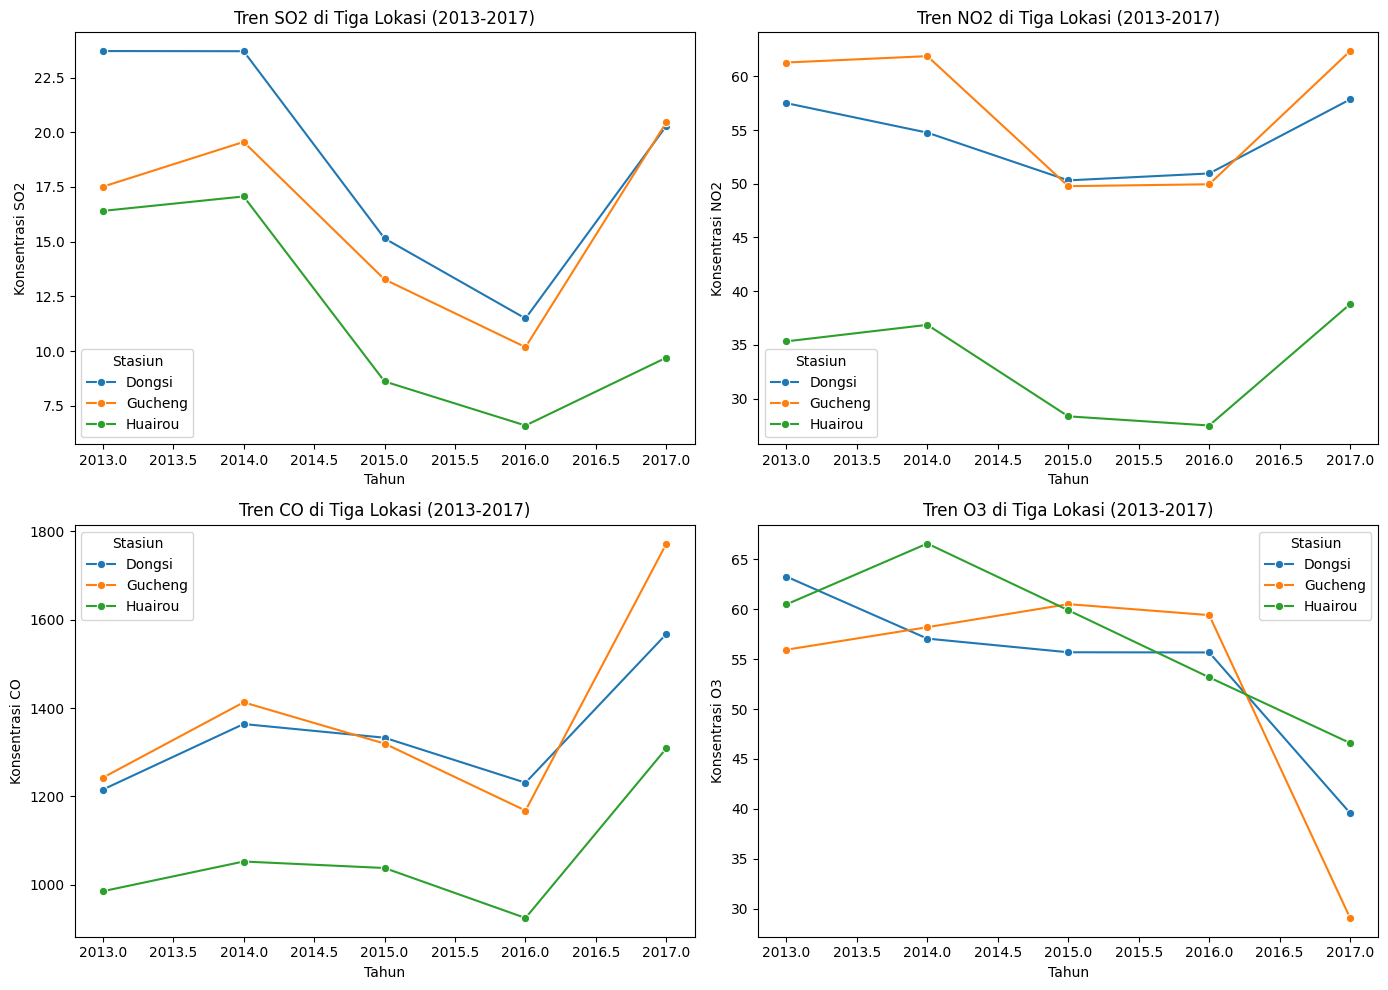

In [205]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
pollutants = ["SO2", "NO2", "CO", "O3"]
titles = ["Tren SO2", "Tren NO2", "Tren CO", "Tren O3"]

for i, ax in enumerate(axes.flat):
    sns.lineplot(data=df_selected_yearly, x="year", y=pollutants[i], hue="station", marker="o", ax=ax)
    ax.set_title(f"{titles[i]} di Tiga Lokasi (2013-2017)")
    ax.set_xlabel("Tahun")
    ax.set_ylabel(f"Konsentrasi {pollutants[i]}")
    ax.legend(title="Stasiun")

plt.tight_layout()
plt.show()

- Kode tersebut untuk mengetahui tren tahunan dari gas polutan dari tahun 2013-2017

Insight: 
- Konsentrasi PM2.5 dan PM10 cenderung menurun dari tahun 2013 hingga 2017 di ketiga lokasi
- Gucheng memiliki tingkat PM2.5 dan PM10 yang lebih tinggi dibandingkan dengan Dongsi dan Huairou
- SO2 mengalami penurunan di semua lokasi
- Gucheng umumnya memiliki tingkat polusi yang lebih tinggi dibandingkan Dongsi dan Huairou, mengindikasikan perbedaan aktivitas ekonomi
- Huairou memiliki kualitas udara yang lebih baik secara keseluruhan

Pertanyaan 2: Bagaimana hubungan antara suhu, kelembaban, tekanan udara dengan tingkat polusi udara (PM2.5)?

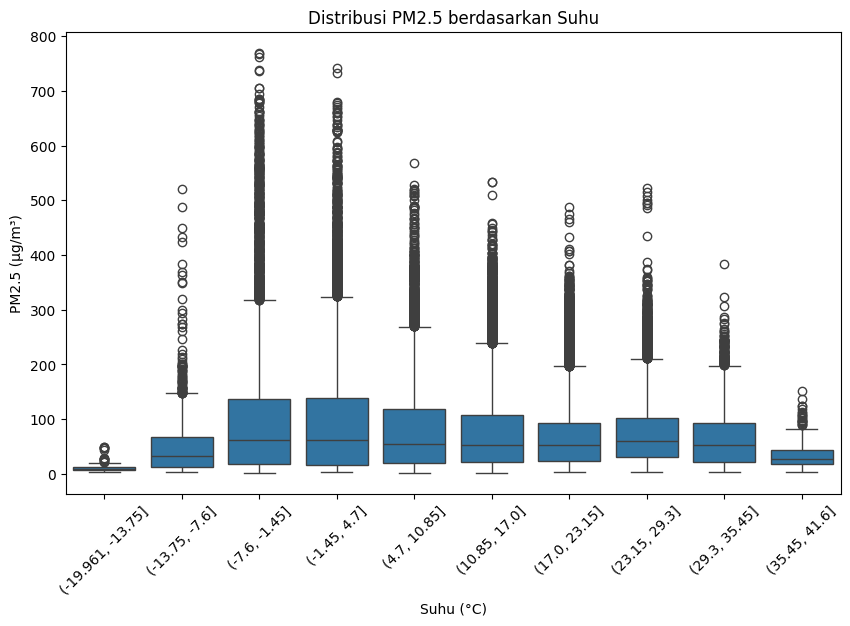

In [206]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=all_df, x=pd.cut(all_df["TEMP"], bins=10), y="PM2.5")
plt.xticks(rotation=45)
plt.title("Distribusi PM2.5 berdasarkan Suhu")
plt.xlabel("Suhu (°C)")
plt.ylabel("PM2.5 (µg/m³)")
plt.show()

- Kode tersebut digunakan untuk melihat distribusi PM2.5 berdasarkan suhu menggunakan boxplot

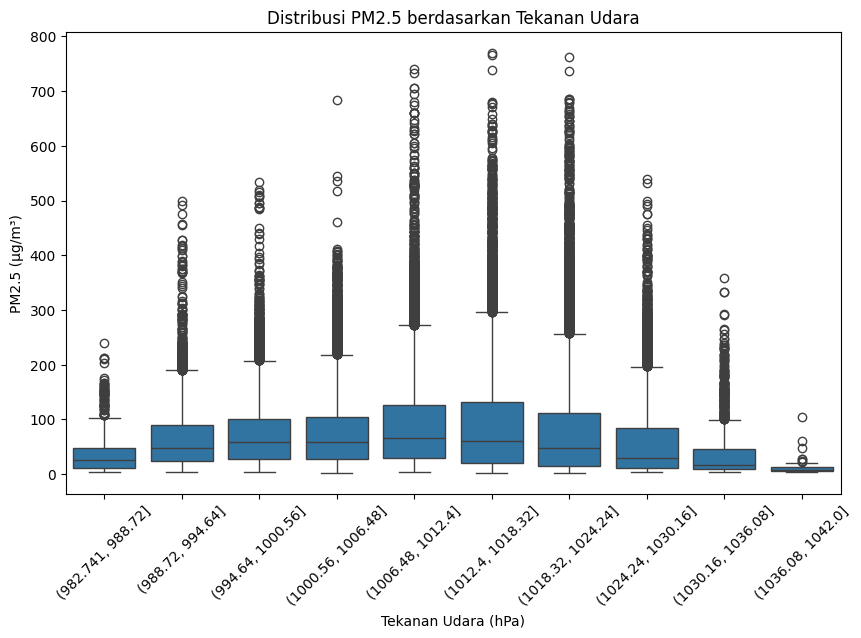

In [207]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=all_df, x=pd.cut(all_df["PRES"], bins=10), y="PM2.5")
plt.xticks(rotation=45)
plt.title("Distribusi PM2.5 berdasarkan Tekanan Udara")
plt.xlabel("Tekanan Udara (hPa)")
plt.ylabel("PM2.5 (µg/m³)")
plt.show()

- Kode tersebut digunakan untuk melihat distribusi PM2.5 berdasarkan tekanan udara menggunakan boxplot

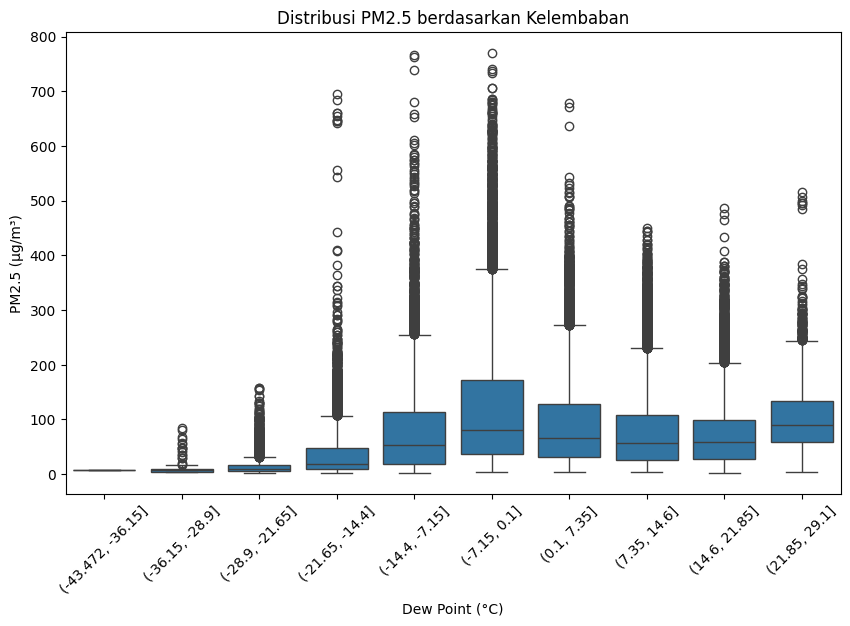

In [208]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=all_df, x=pd.cut(all_df["DEWP"], bins=10), y="PM2.5")
plt.xticks(rotation=45)
plt.title("Distribusi PM2.5 berdasarkan Kelembaban")
plt.xlabel("Dew Point (°C)")
plt.ylabel("PM2.5 (µg/m³)")
plt.show()

- Kode tersebut digunakan untuk melihat distribusi PM2.5 berdasarkan kelembapan menggunakan boxplot

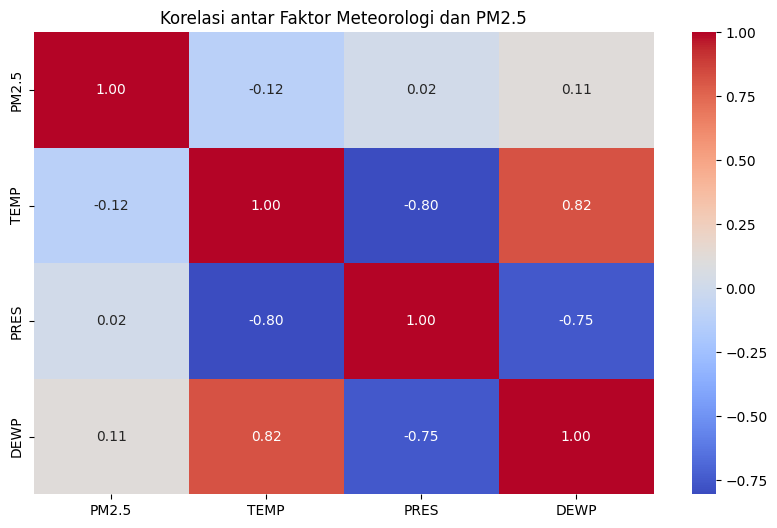

In [209]:
plt.figure(figsize=(10, 6))
correlation_matrix = all_df[["PM2.5", "TEMP", "PRES", "DEWP"]].corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Korelasi antar Faktor Meteorologi dan PM2.5")
plt.show()

- Kode tersebut digunakan untuk membuat heatmap korelasi antara faktor meteorologi dan tingkat polusi PM2.5

Insight:
- Ketika suhu meningkat, tingkat polusi PM2.5 cenderung menurun
- Semakin tinggi kelembaban, konsentrasi PM2.5 cenderung meningkat
- Tekanan udara yang lebih tinggi cenderung berkorelasi dengan tingkat PM2.5 yang lebih rendah

ANALISIS LANJUTAN

Geospatial Analysis

In [210]:
station_coords = {
    "Dongsi": [39.929, 116.417],
    "Gucheng": [39.928, 116.342],
    "Huairou": [40.316, 116.637]
}

- Mencatat kordinat dari ketiga stasiun

In [211]:
avg_pm25 = all_df.groupby("station")["PM2.5"].mean().reset_index()

- Menghitung rata rata pm2.5 dari tiap stasiun

In [212]:
avg_pm25["latitude"] = avg_pm25["station"].map(lambda x: station_coords[x][0])
avg_pm25["longitude"] = avg_pm25["station"].map(lambda x: station_coords[x][1])

- Menambah kordinat ke dataframe

In [213]:
def get_color(pm25):
    if pm25 < 50:
        return "green"
    elif pm25 < 100:
        return "yellow"
    elif pm25 < 150:
        return "orange"
    elif pm25 < 200:
        return "red"
    else:
        return "darkred"

- Membuat fungsi untuk menentukan warna sesuai PM2.5

In [214]:
peta = folium.Map(location=[39.9, 116.4], zoom_start=10)

for _, row in avg_pm25.iterrows():
    folium.CircleMarker(
        location=[row["latitude"], row["longitude"]],
        radius=row["PM2.5"] / 10, 
        color=get_color(row["PM2.5"]),
        fill=True,
        fill_color=get_color(row["PM2.5"]),
        fill_opacity=0.7,
        popup=f"{row['station']}: {row['PM2.5']:.2f} µg/m³"
    ).add_to(peta)

peta

- Membuat peta interaktif dengan library folium
- Menambahkan marker untuk setiap stasiun
- Menampilkan peta

Insight:
- Dari hasil visualisasi peta interaktif, terlihat bahwa semua stasiun pemantauan memiliki warna kuning, yang menunjukkan bahwa rata-rata konsentrasi PM2.5 berada di kisaran 50-100 µg/m³ selama periode 2013-2017
- warna kuning menunjukkan bahwa udara tidak sepenuhnya bersih
